## Cross-lingual word embeddings - Machine Translation


### Tutorial Topics
- Cross-lingual Word Embeddings:
    - GIZA++
    - MUSE

### Software Requirements
- Python (>=3.6)
- PyTorch (>=1.2.0) 
- Jupyter (latest)

- GIZA++ Needs:
    - Perl
    - OSX/Linux (recommended) or a Cygwin Terminal
    
If you are installing GIZA++ on Cygwin, make sure you have Perl, make, and GCC/G++ installed when you install Cygwin (default installation does not include these)


# GIZA++

[`GIZA++`](https://github.com/moses-smt/giza-pp) is an extension of the program `GIZA` (part of the SMT toolkit EGYPT) which was developed by the **Statistical Machine Translation team** during the summer workshop in 1999 at the Center for Language and Speech Processing at Johns-Hopkins University (CLSP/JHU). `Giza++` is an old and trusted resource for sentence alignment.  GIZA++ can be used to train word alignment models. GIZA++ supports [IBM Model](https://en.wikipedia.org/wiki/IBM_alignment_models) 1 to 5 (classic but most widely used unsupervised word alignment models to date). You can find more details [here](https://www.prhlt.upv.es/~evidal/students/master/sht/transp/giza2p.pdf). The extensions of `GIZA++` were designed and written by Franz Josef Och. 

# 1. Installation

**Step 1: Clone Giza++ from GitHub (https://github.com/moses-smt/giza-pp) to Lab1 directory.** 

```
git clone https://github.com/moses-smt/giza-pp.git
```

**Step 2: Change the Giza++ makefile, found at `giza-pp/GIZA++-v2/makefile`. Edit the `CFLAGS_OPT` line as follows:**

- *remove:* 
    * CFLAGS_OPT = $(CFLAGS) -O3 -funroll-loops -DNDEBUG -DWORDINDEX_WITH_4_BYTE -DBINARY_SEARCH_FOR_TTABLE -DWORDINDEX_WITH_4_BYTE 

- *add:*
    * CFLAGS_OPT = $(CFLAGS) -O3 -funroll-loops -DNDEBUG -DWORDINDEX_WITH_4_BYTE -DBINARY_SEARCH_FOR_TTABLE
    
(Not sure why `-DWORDINDEX_WITH_4_BYTE` is duplicated in the original code.)

**Step 3: Amend `giza-pp/GIZA++-v2/model3.cpp` for a case-insensitive file system. Change line 321 to prevent the `.A3.final` file from being overwritten by the `.a3.final` file. Change as follows:**

- *remove*:  
    ```alignfile = Prefix + ".A3." + number ;```
- *add*:  
    ```alignfile = Prefix + ".VA3." + number ;```

**Step 4: Either using your Linux/Mac `terminal` or in your `Cygwin terminal`, navigate to the folder `giza-pp-master`.**

**Step 5: Run the command make. Remove references to tr1. Mac does not support tr1, but these modifications will make it compile just fine.**

```
perl -pi -w -e 's/<tr1\//</g;' GIZA++-v2/* mkcls-v2/*
perl -pi -w -e 's/using namespace std::tr1;//g;' GIZA++-v2/* mkcls-v2/*
perl -pi -w -e 's/std::tr1:://g;' GIZA++-v2/* mkcls-v2/*
sed '36d' mkcls-v2/mystl.h > mkcls-v2/mystl.h.tmp
sed '50d' mkcls-v2/mystl.h.tmp > mkcls-v2/mystl.h
rm mkcls-v2/mystl.h.tmp
make
```

This should create the binaries `~/giza-pp/GIZA++-v2/GIZA++`, `~/giza-pp/GIZA++-v2/snt2cooc.out` and `~/giza-pp/mkcls-v2/mkcls`. If you get any error related to `use of undeclared identifier 'h'`, it is safe to be ignored. 

# 2. Download a Bilingual Corpus

To download a translated parallel bilingual corpora from http://www.statmt.org/europarl/.
we will use the Spanish-English corpus.

Once you unzip, you will have two files, one in L1 (in Spanish, file extension “.es”) and one in L2 (English, file extension “.en”). Then, we will put these two files to folder called `./europarl-es-en/`. We get:
```
./europarl-es-en/
   europarl-v7.es-en.en
   europarl-v7.es-en.es
```


# 3. Preprocessing the Text

Before we use the dataset on Giza++, the parallel corpus must be tokenized. HTML notations needs to be cleaned.
We can do this using the **[moses decoder](https://github.com/moses-smt/mosesdecoder)**, part of the moses SMT package.

**3.1 Download the moses decoder by [cloning from this github repo](https://github.com/moses-smt/mosesdecoder)  to Lab1 directory.**

```
git clone https://github.com/moses-smt/mosesdecoder.git
```

**3.2 Tokenize each of the language pairs separately with moses by running:**

Note. Please change the directories to your corresponding directories.

```
./mosesdecoder/scripts/tokenizer/tokenizer.perl -l en < ./europarl-es-en/europarl-v7.es-en.en > ./europarl-es-en/europarl-v7.es-en.tok.en


./mosesdecoder/scripts/tokenizer/tokenizer.perl -l es < ./europarl-es-en/europarl-v7.es-en.es > ./europarl-es-en/europarl-v7.es-en.tok.es
```

When the tokenization process was complete, you can find two new files in directory `./europarl-es-en/`:
```
./europarl-es-en/
   europarl-v7.es-en.tok.en	
   europarl-v7.es-en.tok.es

```

# 4. Creating the Input Files

We need three types of files to run Giza: (1) a `.vcb` containing a list of vocabulary words for langauges (2) a `.snt` (sentence) file and (3) a `.cooc`, or concurrence file.

**We pass the files in the source language followed by the files in the target language.**.

**4.1  To create the vocabulary file (`.vcb`) and sentence file (`.snt`) run:**


Note. Please change the directories to your corresponding directories.

```
./giza-pp/GIZA++-v2/plain2snt.out ./europarl-es-en/europarl-v7.es-en.tok.es ./europarl-es-en/europarl-v7.es-en.tok.en
```

After running, our `./europarl-es-en/` folder contain four more files:
```
/europarl-es-en/
   europarl-v7.es-en.tok.en_europarl-v7.es-en.tok.es.snt
   europarl-v7.es-en.tok.es_europarl-v7.es-en.tok.en.snt
   europarl-v7.es-en.tok.en.vcb
   europarl-v7.es-en.tok.es.vcb

```

**4.2 Create the concurrence (`.cooc`) file by running the following command.**

Note. Please change the directories to your corresponding directories.

```
./giza-pp/GIZA++-v2/snt2cooc.out ./europarl-es-en/europarl-v7.es-en.tok.es.vcb ./europarl-es-en/europarl-v7.es-en.tok.en.vcb ./europarl-es-en/europarl-v7.es-en.tok.es_europarl-v7.es-en.tok.en.snt > ./europarl-es-en/corp.cooc
```

After running, our `./europarl-es-en/` folder contain one more file:

```
./europarl-es-en/
   corp.cooc
   
```

**4.3 IBM Model 4 and 5 use word classes to model distortion - a concept to model how word order changes across languages. Then run mkcls which is a program to automatically infer word classes from a corpus using a maximum likelihood criterion:**
```
    ./giza-pp/mkcls-v2/mkcls -p./europarl-es-en/europarl-v7.es-en.tok.es -V./europarl-es-en/tokenized_es.vcb.classes
    ./giza-pp/mkcls-v2/mkcls -p./europarl-es-en-small/europarl-v7.es-en.tok.es -V./europarl-es-en-small/tokenized_es.vcb.classes
```


See the paper by [Franz Och](https://www.aclweb.org/anthology/E99-1010/) for the details of this word clustering.

After running, our `./europarl-es-en/` folder contain four more files:
```
./europarl-es-en/
    europarl-v7.es-en.tok.es.vcb.classes.cats
    europarl-v7.es-en.tok.es.vcb.classes
    europarl-v7.es-en.tok.en.vcb.classes.cats
    europarl-v7.es-en.tok.en.vcb.classes

```

# 5. Running Giza++

GIZA++ will output files so we recommend creating a new output directory `giza_output/`. Run the following command:

```
 ./GIZA++ -S [source.vcb]-T [target.vcb] -C [(source_target.snt) or (target_source.snt)]  -CoocurrenceFile [file.cooc] -o [prefix] -outputpath [path to output directory]
```
For our case, the command should be:
```
./giza-pp/GIZA++-v2/GIZA++ -S ./europarl-es-en/europarl-v7.es-en.tok.es.vcb -T ./europarl-es-en/europarl-v7.es-en.tok.en.vcb -C ./europarl-es-en/europarl-v7.es-en.tok.es_europarl-v7.es-en.tok.en.snt -o en-es -CoocurrenceFile ./europarl-es-en/corp.cooc -outputpath ./europarl-es-en/giza_output/
```

The .VA3.final will be output in addition to other files. It contains sentence pairs and word alignments from the source language into the target language.


# Output example:

The following are examples I got using Spanish-English dataset. You can find these translated output from `en-es.VA3.final` file.

### Sentence pair (1) source length 5 target length 4 alignment score : 5.14289e-05
* Sourece: NULL ({ 3 }) Reanudación ({ 1 }) del ({ 2 }) período ({ }) de ({ }) sesiones ({ 4 })
* Translated Target: Resumption of the session
* Gold Target: Resumption of the session

### Sentence pair (4) source length 23 target length 21 alignment score : 8.95008e-31
*  Sourece: NULL ({ 7 12 13 }) Sus ({ 1 }) Señorías ({ }) han ({ 2 }) solicitado ({ 3 }) un ({ 4 }) debate ({ 5 }) sobre ({ 6 }) el ({ }) tema ({ 8 }) para ({ }) los ({ }) próximos ({ 14 15 }) días ({ 16 }) , ({ 17 }) en ({ 9 }) el ({ 10 }) curso ({ 11 18 }) de ({ }) este ({ 19 }) período ({ }) de ({ }) sesiones ({ 20 }) . ({ 21 })

* Translated Target: You have requested a debate on this subject in the course of the next few days , during this part-session .
* Gold Target: You have requested a debate on this subject in the course of the next few days, during this part-session.

### Sentence pair (6) source length 16 target length 12 alignment score : 1.45869e-22
*  Sourece: NULL ({ 3 5 9 }) Invito ({ 1 2 }) a ({ }) todos ({ }) a ({ }) que ({ }) nos ({ }) pongamos ({ 4 }) de ({ }) pie ({ }) para ({ 6 }) guardar ({ 7 }) un ({ }) minuto ({ 8 }) de ({ }) silencio ({ 10 11 }) . ({ 12 })
* Translated Target:  Please rise , then , for this minute &apos; s silence .
* Gold Target: Please rise, then, for this minute' s silence.


Let us take a look at these samples. 

The source language is Spanish:  `NULL ({ 3 }) Reanudación ({ 1 }) del ({ 2 }) período ({ }) de ({ }) sesiones ({ 4 })`.

The target language is Engish: `Resumption of the session`.

`NULL ({ 3 })` indicate that third token of target language doesn't align to any token of source language. 

`Reanudación ({ 1 })` indicate that the first token of target language align to `Reanudación` of source language.

`período ({ })` indicate that `período` of source language doesn't have any alignment in English.

In sentenece pair (4), `NULL ({ 7 12 13 })` means the `7th (this) , 12th (of) , and 13th (the)` token of target sentence don't have alignment in Spanish. `próximos ({ 14 15 })` indicate that `14th (next) , 15th (few)` token of target sentence align to `próximos` of source language. 

Let us take a look at other important output files.

* File `en-es.trn.src.vcb` is the dictionay of source language on training set. It maps from source words to word IDs. In each row, first item is word ID; second item is token of source language; third item is the token frequency. 
* File `en-es.trn.trg.vcb` is dictionary of target language on training set. It maps from target words to word IDs. In each row, first item is word ID; second item is token of target language; third item is the token frequency.   

* File `en-es.t3.final` is translation table after all iterations that align source language with target language. First column is the ID of source language. Second column is the ID of target language. Third column is the probability of that alignment is given after each set of tokens. 

For example: In en-es.trn.src.vcb, the 31st row is `31 . 192152` that means the index of `'.'` token is 31, and its frequency is 192152 in source language (i.e., Spanish). 

Then, you can find the alignment of `'.'` in the translation table (i.e., en-es.t3.final): 

| src | trg | align       |
|-----|-----|-------------|
| 31  | 22  | 1.30462e-05 |
| 31  | 29  | 1.32761e-05 |
| 31  | 30  | 1.27958e-06 |
| 31  | 32  | 1.34422e-05 |
| 31  | 37  | 0.984368    |
| 31  | 39  | 7.68823e-05 |
| 31  | 44  | 2.97203e-05 |
| 31  | 50  | 4.78602e-06 |
| 31  | 63  | 4.65898e-05 |

Then, this table converted to:

| src | trg | align       |
|-----|-----|-------------|
| .  | again  | 1.30462e-05 |
| .  | year  | 1.32761e-05 |
| .  | in  | 1.27958e-06 |
| .  | that  | 1.34422e-05 |
| .  | .  | 0.984368    |
| .  | as  | 7.68823e-05 |
| .  | &apos;  | 2.97203e-05 |
| .  | people  | 4.78602e-06 |
| .  | this  | 4.65898e-05 |

You can see that the best alignment of source `'.'` is the target `'.'`. This alignment obtain the hightest probability.

# [MUSE: Multilingual Unsupervised and Supervised Embeddings](https://research.fb.com/downloads/muse-multilingual-unsupervised-and-supervised-embeddings/)

MUSE is a Python library for multilingual word embeddings, whose goal is to provide the community with:

* state-of-the-art multilingual word embeddings based on [fastText](https://github.com/facebookresearch/fastText)
* large-scale high-quality bilingual dictionaries for training and evaluation

MUSE includes two methods, one `supervised` that uses a bilingual dictionary or identical character strings, and one `unsupervised` that does not use any parallel data (see paper [Word Translation without Parallel Data](https://arxiv.org/pdf/1710.04087.pdf) for more details).

![](./outline_all.png)

You can align any bilingual word embeddings using MUSE package. You can explore the training process [here](https://github.com/facebookresearch/MUSE).

MUSE released their fastText embeddings that have been aligned in a common space [here](https://github.com/facebookresearch/MUSE#download). Let us download English and Spanish word embeddings. 

# Require packages

In [1]:
import io
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

**Create a function that loads a word vector file into memory and returns word embeddings, identifier to word and word to identifier mapping**

In [2]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [3]:
src_path = './muse/wiki.multi.en.vec'
tgt_path = './muse/wiki.multi.es.vec'
nmax = 50000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

In [4]:
print(src_embeddings.shape)
print(tgt_embeddings.shape)

(50000, 300)
(50000, 300)


**We will use [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) to measure the similarity between two word embedding vectors. The formula of cos similarity is:**

$similarity = cos(\theta) = \frac{A \cdot B}{||A|| ||B||} = \frac{\sum_{i=1}^{d} A_iB_i}{\sqrt{\sum_{i=1}^{d} A^2_i}\sqrt{\sum_{i=1}^{d} B^2_i}}$

**Now, we assume A is the vector of `cat` in English and B is the `dog` in English.**

In [5]:
A = src_embeddings[src_word2id['cat']]
B = src_embeddings[src_word2id['dog']]
print(A.shape, B.shape)
cos_sim = np.dot(A, B) / np.linalg.norm(A) * np.linalg.norm(B)
print("cosine similarity = ",cos_sim)

(300,) (300,)
cosine similarity =  0.638051699007895


**We can use the `cosine_similarity` function from sklearn.**

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
#  the shape of A and B must be (n_samples_X, n_features). Hence we reshape the A and B vectors.
print("cosine similarity = ", cosine_similarity(A.reshape(1, -1),B.reshape(1, -1))) 

cosine similarity =  [[0.63805158]]


**Let's print the 5 nearest neighbors of `cat`.**

In [7]:
# get all similarity scores between cat and all the tokens in English vocabulary. 
all_scores = cosine_similarity(src_embeddings, A.reshape(1, -1))
print(all_scores.shape)

# reshape (num_vocabulary, 1) to (num_vocabulary)
all_scores = np.squeeze(all_scores,axis=1)
print(all_scores.shape)

# get indices of the 5 nearest neighbors
top5_ind = all_scores.argsort()[-5:][::-1]
print(top5_ind)

# convert the indices to actual tokens
for i, idx in enumerate(top5_ind):
    print('%.4f - %s' % (all_scores[idx], src_id2word[idx]))

(50000, 1)
(50000,)
[ 2570  4939 25570  2344 36108]
1.0000 - cat
0.7322 - cats
0.6453 - kitten
0.6381 - dog
0.6218 - kittens


**Buid a function to get the $n$ nearest neighbors of given word.**

In [8]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    # create to map word to index
    word2id = {v: k for k, v in src_id2word.items()}
    # get the word embedding of give word 
    word_emb = src_emb[word2id[word]]
    # get all similarity scores between given word and all the tokens in target vocabulary. 
    scores = np.squeeze(cosine_similarity(tgt_emb, word_emb.reshape(1, -1)),axis=1)
    # get indices of the n nearest neighbors
    k_best = scores.argsort()[-K:][::-1]
    # convert the indices to actual tokens
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [9]:
# printing nearest neighbors in the source space (English)
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "cat":
1.0000 - cat
0.7322 - cats
0.6453 - kitten
0.6381 - dog
0.6218 - kittens


In [10]:
# printing nearest neighbors in the source space (English)
src_word = 'king'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "king":
1.0000 - king
0.6762 - kings
0.6493 - queen
0.6260 - monarch
0.5978 - kingship


In [11]:
# printing nearest neighbors in the target space (Spanish)
src_word = 'cat'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "cat":
0.6165 - gato
0.5401 - perro
0.4849 - conejo
0.4839 - gorila
0.4746 - felino


In [12]:
# printing nearest neighbors in the target space (Spanish)
src_word = 'king'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "king":
0.8047 - rey
0.6728 - monarca
0.6187 - reina
0.5814 - reinar
0.5755 - reyes


# Visualize multilingual embeddings

In order to visualize the word embeddings in 2 dimensional space, we will use PCA to map word embeddings from 300 dimensions to 2 dimensions.

In [13]:
from sklearn.decomposition import PCA
# instantiate a PCA object which includes two components
pca = PCA(n_components=2, whiten=True)
# use PCA object on src_embeddings and tgt_embeddings
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
# how much variance of orignial embeddings (300 dimensions) is explained in PCA components (2 dimensions)?
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.06


In [14]:
import matplotlib.pyplot as plt

def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

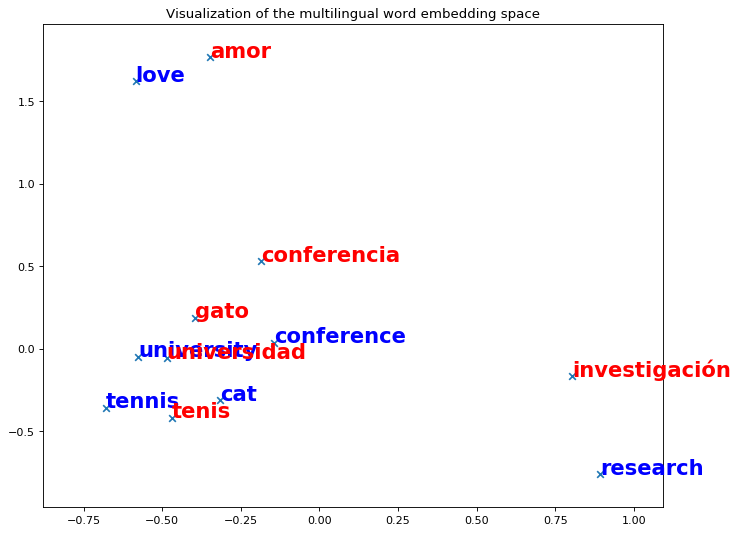

In [17]:
# get 5 random input words
src_words = ['university', 'love', 'cat', 'tennis', 'research', 'conference']
tgt_words = ['universidad', 'amor', 'gato', u'tenis',  u'investigación', 'conferencia']

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)

# Reference 
* https://medium.com/@weGotlieb/using-giza-for-bilingual-sentence-alignment-8b2dc828a04d
* http://www.statmt.org/moses/?n=Moses.Baseline
* https://www.aclweb.org/anthology/E99-1010/
* http://masatohagiwara.net/using-giza-to-obtain-word-alignment-between-bilingual-sentences.html
* https://okapiframework.org/wiki/index.php/GIZA%2B%2B_Installation_and_Running_Tutorial
* https://www.ijert.org/research/word-alignment-using-giza-and-cygwin-on-windows-IJERTV2IS50775.pdf
* https://github.com/facebookresearch/MUSE/blob/master/demo.ipynb